# Overview of ARIMA models
----------------------------------------------

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import statsmodels as sm
import scipy.stats as stats
from scipy.ndimage.interpolation import shift
import statsmodels.graphics.tsaplots as tsaplots
import statsmodels.api as sm


In [2]:
from statsmodels.graphics.api import qqplot

In [3]:
# datos Dane + index (Elmer)
Data = pd.read_csv('data-1.csv', dayfirst = False, decimal =',' , index_col=None, parse_dates=[0])
#Data['Date'] = pd.to_datetime(Data['date'])

Data.describe()

,index,dane
count,70.000000,70.000000
mean,0.909854,0.507857
std,1.884844,0.670515
min,-2.915657,-1.000000
25%,-0.413110,0.050000
50%,0.727916,0.410000
75%,1.820389,0.940000
max,7.506650,2.820000


In [4]:
Data.head(7)

,date,index,dane
0,2010-01-10,0.211742,-0.44
1,2010-01-11,0.987522,1.65
2,2010-01-12,5.314398,1.65
3,2011-01-01,2.813850,1.61
4,2011-01-02,1.780625,0.66
5,2011-01-03,2.428240,0.08
6,2011-01-04,1.296421,-0.04


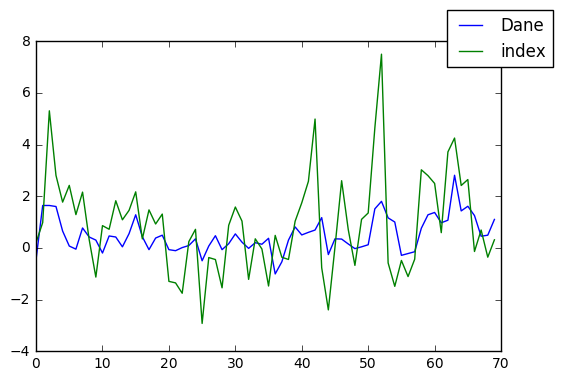

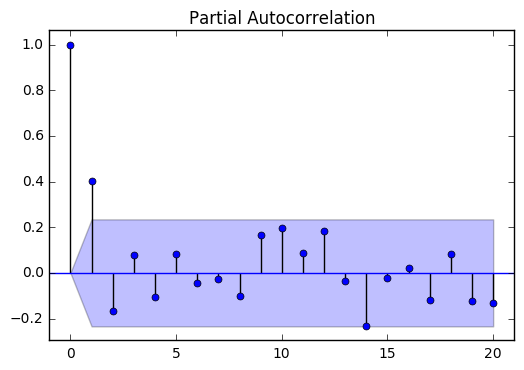

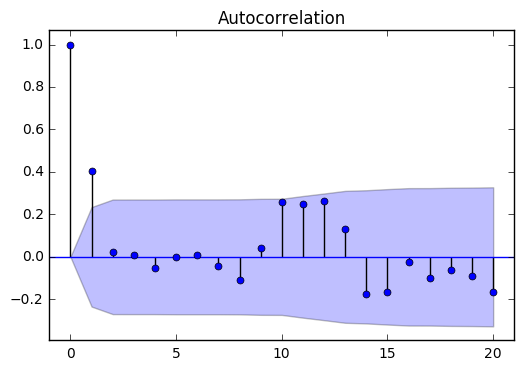

In [8]:
plt.plot(Data['dane'], label = "Dane")
plt.plot(Data['index'], label = "index")
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
tsaplots.plot_pacf(Data['index'], lags = 20)
tsaplots.plot_acf(Data['index'], lags=20);


Durbin--Watson test https://bicorner.com/2015/11/16/time-series-analysis-using-ipython/?blogsub=confirming#subscribe-blog

The Durbin-Watson statistic ranges in value from 0 to 4. A value near 2 indicates non-autocorrelation; a value toward 0 indicates positive autocorrelation; a value toward 4 indicates negative autocorrelation.

In [24]:
(sm.stats.durbin_watson(Data['index']),sm.stats.durbin_watson(Data['dane']) )

(0.96191133066309931, 0.59195616603601342)

In [25]:
ARMAindex = sm.tsa.ARMA(Data['index'].values, (12,4))
Ind = ARMAindex.fit()
Ind.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                   70
Model:                    ARMA(12, 4)   Log Likelihood                -125.354
Method:                       css-mle   S.D. of innovations              1.321
Date:                Mon, 12 Sep 2016   AIC                            286.708
Time:                        23:43:34   BIC                            327.181
Sample:                             0   HQIC                           302.785
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.0299      0.402      2.564      0.013         0.243     1.817
ar.L1.y        0.6664      0.123      5.436      0.000         0.426     0.907
ar.L2.y       -0.7608      0.155     -4.917      0.000        -1.064    -0.458
ar.L3.y        0.5513      0.181      3.038      0.004         0.196     0.907
ar.L4.y       -1.0170      0.186     -5.460      0.000        -1.382    -0.652
ar.L5.y        0.6268      0.218      2.874      0.006         0.199     1.054
ar.L6.y       -0.3736      0.230     -1.624      0.110        -0.825     0.077
ar.L7.y        0.2673      0.236      1.134      0.262        -0.195     0.729
ar.L8.y       -0.2460      0.231     -1.064      0.292        -0.699     0.207
ar.L9.y        0.1497      0.202      0.742      0.461        -0.246     0.545
ar.L10.y       0.1593      0.189      0.843      0.403        -0.211     0.530
ar.L11.y      -0.0641      0.155     -0.413      0.681        -0.368     0.240
ar.L12.y       0.2514      0.139      1.804      0.077        -0.022     0.525
ma.L1.y       -0.2020      0.116     -1.735      0.089        -0.430     0.026
ma.L2.y        0.4822      0.081      5.970      0.000         0.324     0.640
ma.L3.y       -0.2020      0.102     -1.987      0.052        -0.401    -0.003
ma.L4.y        1.0000      0.158      6.338      0.000         0.691     1.309
                                    Roots                                     
==============================================================================
                  Real           Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.1216           -0.0000j            1.1216           -0.0000
AR.2             0.8522           -0.6167j            1.0520           -0.0997
AR.3             0.8522           +0.6167j            1.0520            0.0997
AR.4             0.5521           -0.8954j            1.0520           -0.1621
AR.5             0.5521           +0.8954j            1.0520            0.1621
AR.6             0.1394           -1.2609j            1.2685           -0.2325
AR.7             0.1394           +1.2609j            1.2685            0.2325
AR.8            -0.4585           -0.9435j            1.0490           -0.3220
AR.9            -0.4585           +0.9435j            1.0490            0.3220
AR.10           -0.8022           -0.7060j            1.0686           -0.3851
AR.11           -0.8022           +0.7060j            1.0686            0.3851
AR.12           -1.4324           -0.0000j            1.4324           -0.5000
MA.1            -0.5676           -0.8233j            1.0000           -0.3461
MA.2            -0.5676           +0.8233j            1.0000            0.3461
MA.3             0.6686           -0.7437j            1.0000           -0.1335
MA.4             0.6686           +0.7437j            1.0000            0.1335
------------------------------------------------------------------------------
""

## Analyzing the Residuals

In [26]:
residuals = Ind.resid

In [27]:
# small p-values indicates that the data is not normally distributed
stats.normaltest(residuals)

NormaltestResult(statistic=2.0251213444070544, pvalue=0.36328752723555463)

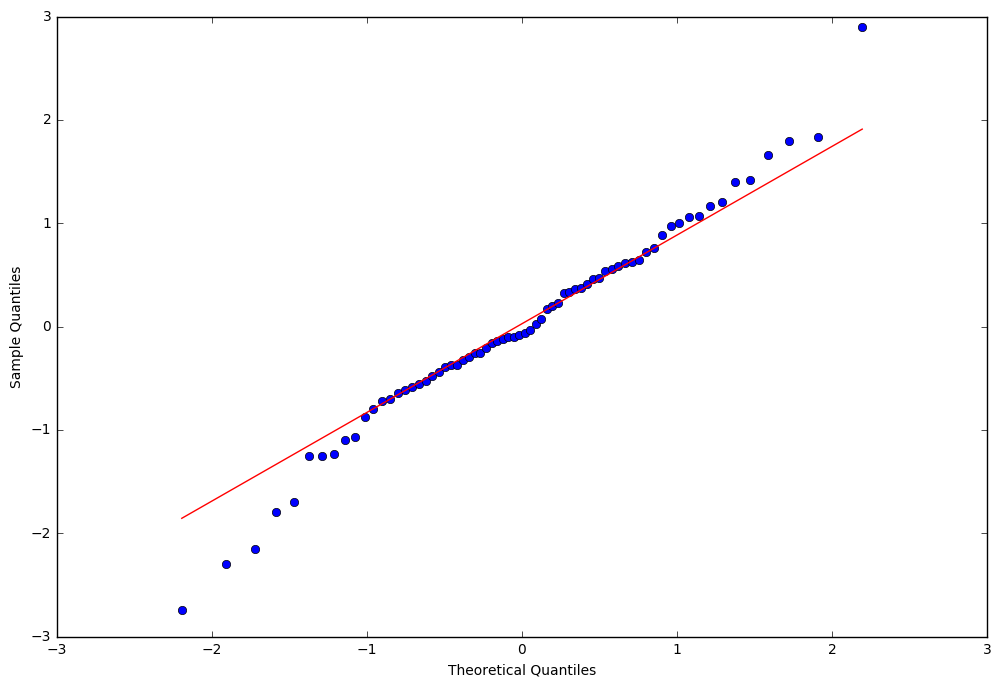

In [28]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(residuals, line='q', ax=ax, fit=True)

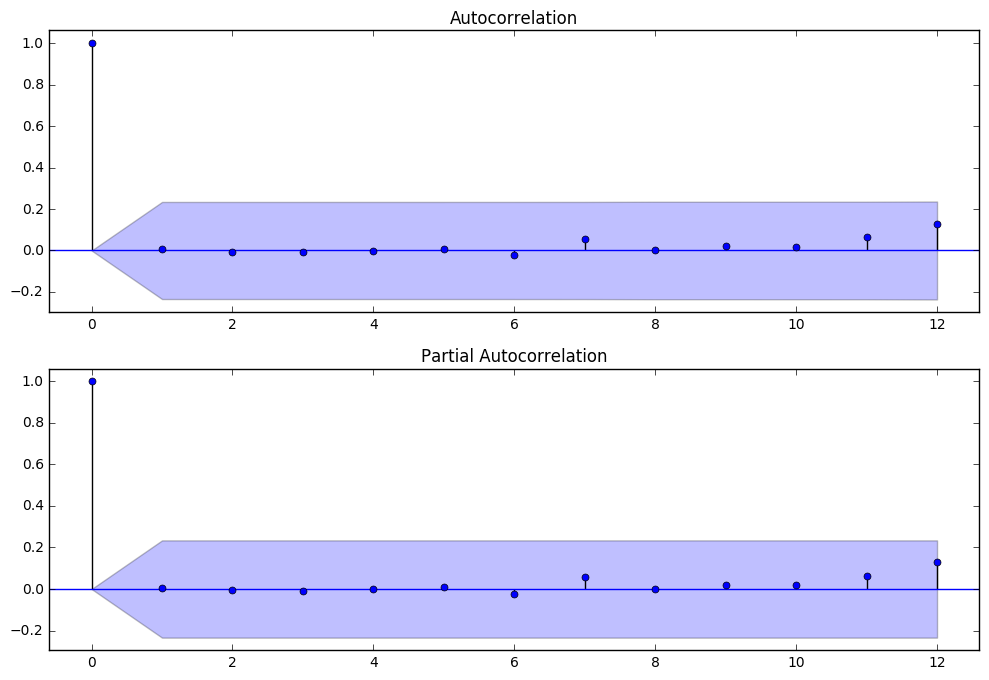

In [29]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = tsaplots.plot_acf(residuals, lags=12, ax=ax1)
ax2 = fig.add_subplot(212)
fig = tsaplots.plot_pacf(residuals, lags=12, ax=ax2)

In [30]:
# Notice that the p-values for the Ljung–Box Q test above .05 
# indicate “significance.” 

r,q,p = sm.tsa.acf(residuals, qstat=True)
nlags = 15
data = np.c_[range(1,nlags), r[1:nlags], q[1:nlags], p[1:nlags]]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print table.set_index('lag')

            AC         Q  Prob(>Q)
lag                               
1.0   0.004958  0.004284  0.997861
2.0  -0.005794  0.010040  0.999733
3.0  -0.008748  0.010068  0.999987
4.0  -0.000607  0.014755  0.999999
5.0   0.007774  0.055224  0.999997
6.0  -0.022669  0.310505  0.999888
7.0   0.056489  0.310522  0.999979
8.0   0.000452  0.341515  0.999994
9.0   0.019368  0.365214  0.999999
10.0  0.016797  0.707400  0.999992
11.0  0.063291  2.142491  0.999154
12.0  0.128510  2.176782  0.999636
13.0 -0.019693  2.474095  0.999699
14.0  0.057476  2.974397  0.999619


## Predictions

In [46]:
ini, fin = 2, 100
reference = range(ini, fin+1)
predictions = Ind.predict(ini, fin, dynamic=False)
# print predictions

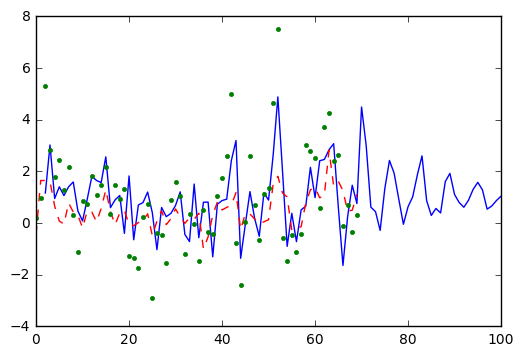

In [47]:
#ax =range(2,5).plot(figsize=(12,8))
plt.plot( reference, predictions);
plt.plot( Data["dane"],'r--' );
plt.plot( Data["index"],'g.' )
#ax.legend();
#ax.axis((-20.0, 38.0, -4.0, 200.0));